In [63]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

## Import Raw Data

In [67]:
df = pd.read_csv('AirBnB - Regression/train.csv')
df_test = pd.read_csv('AirBnB - Regression/test.csv')
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,40.830190,-73.949911,En suite room Upper West Side,Hamilton Heights,1,100.0,https://a0.muscache.com/im/pictures/90125799/6...,10031,1.0,1.0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,38.923224,-77.028447,Cozy or King BR in a grand victorian,Columbia Heights,146,96.0,https://a0.muscache.com/im/pictures/64128167/5...,20009,1.0,2.0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,40.668250,-73.953039,COMFORTABLE & COZY-2 STOPS BARCLAY,Crown Heights,10,92.0,https://a0.muscache.com/im/pictures/56585377/e...,11225.0,1.0,1.0
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,40.668870,-73.952920,Sunny & Colorful Private BR in Crown Heights,Crown Heights,0,NaN,https://a0.muscache.com/im/pictures/d76d0e9a-e...,11225.0,1.0,1.0
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,40.741597,-73.906845,Lovely & Cozy Apartment in Queens!,Woodside,45,93.0,https://a0.muscache.com/im/pictures/435d8af0-f...,11377,2.0,3.0


## Clean Up Dataset

In [69]:
# remove thumbnail_url column
df = df.drop('thumbnail_url', axis=1)
df_test = df_test.drop('thumbnail_url', axis=1)

In [70]:
# convert data type - strip % symbol from host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df_test['host_response_rate'] = df_test['host_response_rate'].str.replace('%', '').astype(float)

In [71]:
df_test['host_response_rate']

0          NaN
1        100.0
2        100.0
3          NaN
4        100.0
5        100.0
6        100.0
7        100.0
8          NaN
9        100.0
10        97.0
11         NaN
12       100.0
13         NaN
14       100.0
15       100.0
16       100.0
17        91.0
18         NaN
19       100.0
20       100.0
21         NaN
22       100.0
23       100.0
24       100.0
25       100.0
26       100.0
27         NaN
28       100.0
29         NaN
         ...  
23081    100.0
23082     80.0
23083      NaN
23084    100.0
23085    100.0
23086     94.0
23087     96.0
23088    100.0
23089    100.0
23090    100.0
23091    100.0
23092    100.0
23093      NaN
23094      NaN
23095    100.0
23096    100.0
23097    100.0
23098    100.0
23099    100.0
23100     87.0
23101    100.0
23102    100.0
23103     90.0
23104     90.0
23105    100.0
23106     71.0
23107    100.0
23108     95.0
23109    100.0
23110     90.0
Name: host_response_rate, Length: 23111, dtype: float64

## Visualize Data Distribution

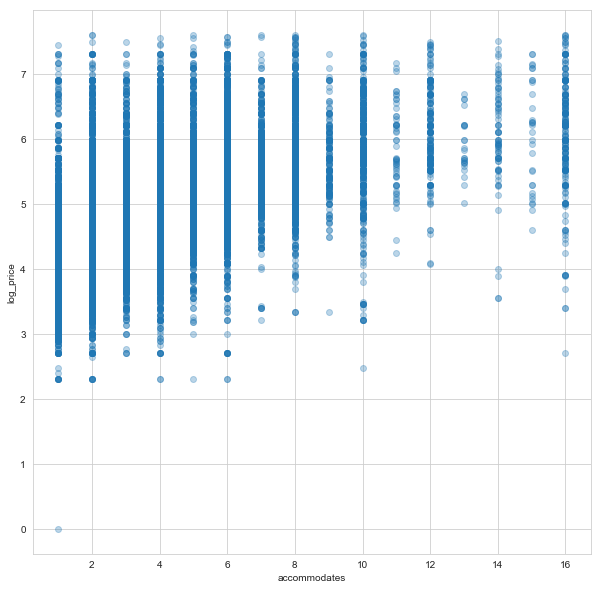

In [11]:
# plot between log_price vs accommodates

plt.figure(figsize=(10,10))
plt.xlabel('accommodates')
plt.ylabel('log_price')

plt.plot(df['accommodates'], df['log_price'], 'o', alpha=0.3)
plt.show()

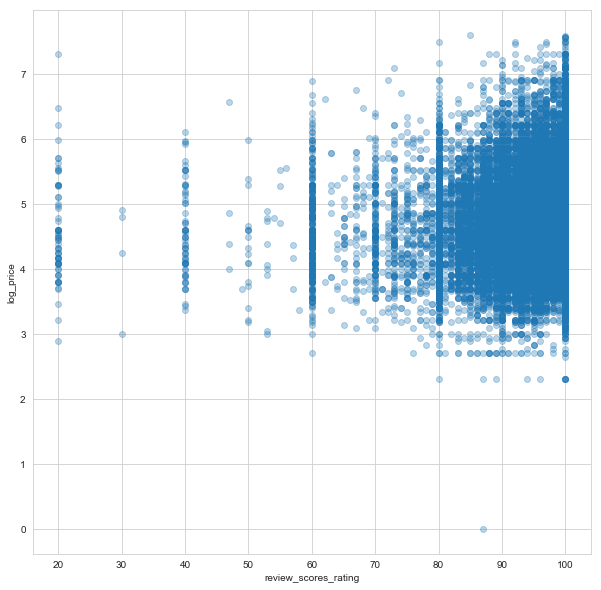

In [12]:
# plot between log_price vs review_scores_rating

plt.figure(figsize=(10,10))
plt.xlabel('review_scores_rating')
plt.ylabel('log_price')

plt.plot(df['review_scores_rating'], df['log_price'], 'o', alpha=0.3)
plt.show()

## Missing Data

In [73]:
# see how many missing values exist and where they are
print('Train:')
print(df.isnull().sum())
print('')
print('Test:')
print(df_test.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64

id                           0
property_type                0
room_type                   

In [74]:
# fill in missing values in host_has_profile_pic, host_identity_verified with 'N/A'
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna('N/A')
df['host_identity_verified'] = df['host_identity_verified'].fillna('N/A')

df_test['host_has_profile_pic'] = df_test['host_has_profile_pic'].fillna('N/A')
df_test['host_identity_verified'] = df_test['host_identity_verified'].fillna('N/A')

In [75]:
# convert dates to number of days ago
import dateutil.parser
from datetime import datetime

def ndays(date): # pass in timestamp
    if pd.isna(date) == False:
        date_format = '%Y-%m-%d'
        today = '2019-05-14'
        delta = datetime.strptime(today, date_format) - datetime.strptime(str(dateutil.parser.parse(str(date)).date()), date_format)
        return delta.days

df['first_review'] = df['first_review'].apply(ndays)
df['host_since'] = df['host_since'].apply(ndays)
df['last_review'] = df['last_review'].apply(ndays)

df_test['first_review'] = df_test['first_review'].apply(ndays)
df_test['host_since'] = df_test['host_since'].apply(ndays)
df_test['last_review'] = df_test['last_review'].apply(ndays)

df_test[['first_review', 'host_since', 'last_review']].head()

,first_review,host_since,last_review
0,1388.0,1427.0,1388.0
1,1607.0,1697.0,745.0
2,1101.0,1690.0,675.0
3,NaN,1500.0,NaN
4,1116.0,1177.0,607.0


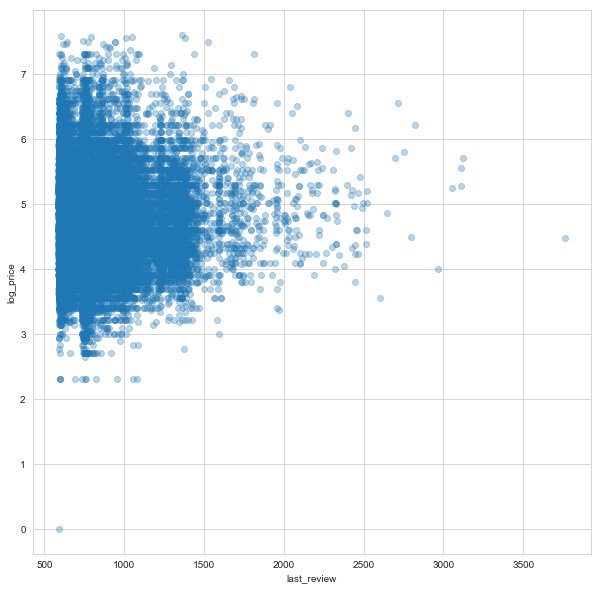

In [27]:
# plot between log_price vs review_scores_rating

plt.figure(figsize=(10,10))
plt.xlabel('last_review')
plt.ylabel('log_price')

plt.plot(df['last_review'], df['log_price'], 'o', alpha=0.3)
plt.show()

In [76]:
# option 1: remove the listings that don't have a first/last review date
# option 2: replace the missing date values with feature mean/median value (would keep original dataset mean/median)

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['first_review'] = df['first_review'].fillna(df['first_review'].mean())
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['host_since'] = df['host_since'].fillna(df['host_since'].mean())
df['last_review'] = df['last_review'].fillna(df['last_review'].mean())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['beds'] = df['beds'].fillna(df['beds'].mean())

df_test['bathrooms'] = df_test['bathrooms'].fillna(df_test['bathrooms'].mean())
df_test['first_review'] = df_test['first_review'].fillna(df_test['first_review'].mean())
df_test['host_response_rate'] = df_test['host_response_rate'].fillna(df_test['host_response_rate'].mean())
df_test['host_since'] = df_test['host_since'].fillna(df_test['host_since'].mean())
df_test['last_review'] = df_test['last_review'].fillna(df_test['last_review'].mean())
df_test['review_scores_rating'] = df_test['review_scores_rating'].fillna(df_test['review_scores_rating'].mean())
df_test['bedrooms'] = df_test['bedrooms'].fillna(df_test['bedrooms'].mean())
df_test['beds'] = df_test['beds'].fillna(df_test['beds'].mean())

In [ ]:
# host_response_rate, host_since_date: fill in nans with feature mean since some listings with reviews have nan host_response_rate
# decent number of listings without a host_reponse_rate value

In [ ]:
# those without a review date have 0 for number_of_reviews and nan review_scores_rating

## See Specific Category Labels

In [8]:
df.groupby('city').count()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
city,,,,,,,,,,,,,,,,,,,,,
Boston,2391,2391,2391,2391,2391,2391,2386,2391,2391,2391,...,1974,2391,2391,2391,2391,2391,1954,2378,2388,2389
Chicago,2585,2585,2585,2585,2585,2585,2582,2585,2585,2585,...,2248,2585,2585,2585,2141,2585,2234,2561,2584,2584
DC,3893,3893,3893,3893,3893,3893,3887,3893,3893,3893,...,2829,3893,3893,3893,3356,3893,2791,3843,3887,3885
LA,15387,15387,15387,15387,15387,15387,15344,15387,15387,15387,...,11966,15387,15387,15387,11705,15387,11797,15190,15369,15361
NYC,22256,22256,22256,22256,22256,22256,22190,22256,22256,22256,...,17568,22256,22256,22256,22250,22256,17232,21950,22224,22212
SF,4488,4488,4488,4488,4488,4488,4478,4488,4488,4488,...,3589,4488,4488,4488,4482,4488,3542,4433,4485,4484


In [30]:
df.groupby('zipcode').nunique()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
zipcode,,,,,,,,,,,,,,,,,,,,,
,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
02108,59,37,5,2,56,7,5,2,3,2,...,39,59,59,57,4,40,15,1,5,4
02109,44,31,6,2,41,7,4,1,3,2,...,25,44,44,44,4,30,13,1,4,5
02110,17,10,3,1,11,6,3,1,2,2,...,16,17,17,17,3,13,13,1,4,4
02111,75,48,4,2,59,9,4,1,3,2,...,43,75,75,74,5,27,19,1,5,6
02113,90,47,4,2,82,9,4,3,3,2,...,45,90,90,90,2,50,18,1,5,5
02114,139,82,4,3,132,8,5,2,4,2,...,73,139,139,139,6,52,21,1,5,6
02115,119,73,6,3,110,7,6,3,4,2,...,67,119,119,119,3,45,23,1,5,4
02116,230,114,8,3,214,11,7,3,4,2,...,99,230,230,230,5,69,28,1,5,8


## Feature Engineering
One-hot encode the following categorical features:
    - property_type
    - room_type
    - bed_type
    - cancellation_policy
    - cleaning_fee
    - city
    - host_has_profile_pic
    - host_identity_verified
    - instant_bookable

In [151]:
# one-hot encode features on training set
df_proptype = pd.get_dummies(df['property_type'])
df = pd.concat([df, df_proptype], axis=1)

df_roomtype = pd.get_dummies(df['room_type'])
df = pd.concat([df, df_roomtype], axis=1)

df_bedtype = pd.get_dummies(df['bed_type'])
df = pd.concat([df, df_bedtype], axis=1)

df_cancel = pd.get_dummies(df['cancellation_policy'])
df = pd.concat([df, df_cancel], axis=1)

df_cleanfee = pd.get_dummies(df['cleaning_fee'])
df_cleanfee.columns = ['cleaning_fee_false', 'cleaning_fee_true']
df = pd.concat([df, df_cleanfee], axis=1)

df_city = pd.get_dummies(df['city'])
df = pd.concat([df, df_city], axis=1)

df_hostpic = pd.get_dummies(df['host_has_profile_pic'])
df_hostpic.columns = ['host_pic_na', 'host_pic_false', 'host_pic_true']
df = pd.concat([df, df_hostpic], axis=1)

df_hostid = pd.get_dummies(df['host_identity_verified'])
df_hostid.columns = ['host_id_na', 'host_id_false', 'host_id_true']
df = pd.concat([df, df_hostid], axis=1)

df_instant = pd.get_dummies(df['instant_bookable'])
df_instant.columns = ['instant_false', 'instant_true']
df = pd.concat([df, df_instant], axis=1)

df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,NYC,SF,host_pic_na,host_pic_false,host_pic_true,host_id_na,host_id_false,host_id_true,instant_false,instant_true
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,1,0,0,1,0,1
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,1,0,0,1,1,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,0,0,0,1,0,0,1,0,1
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,1,0,0,0,1,0,0,1,1,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,1,0,0,1,1,0


In [91]:
# one-hot encode features on test set
df_test_proptype = pd.get_dummies(df_test['property_type'])
df_test = pd.concat([df_test, df_test_proptype], axis=1)

df_test_roomtype = pd.get_dummies(df_test['room_type'])
df_test = pd.concat([df_test, df_test_roomtype], axis=1)

df_test_bedtype = pd.get_dummies(df_test['bed_type'])
df_test = pd.concat([df_test, df_test_bedtype], axis=1)

df_test_cancel = pd.get_dummies(df_test['cancellation_policy'])
df_test = pd.concat([df_test, df_test_cancel], axis=1)

df_test_cleanfee = pd.get_dummies(df_test['cleaning_fee'])
df_test_cleanfee.columns = ['cleaning_fee_false', 'cleaning_fee_true']
df_test = pd.concat([df_test, df_test_cleanfee], axis=1)

df_test_city = pd.get_dummies(df_test['city'])
df_test = pd.concat([df_test, df_test_city], axis=1)

df_test_hostpic = pd.get_dummies(df_test['host_has_profile_pic'])
df_test_hostpic.columns = ['host_pic_na', 'host_pic_false', 'host_pic_true']
df_test = pd.concat([df_test, df_test_hostpic], axis=1)

df_test_hostid = pd.get_dummies(df_test['host_identity_verified'])
df_test_hostid.columns = ['host_id_na', 'host_id_false', 'host_id_true']
df_test = pd.concat([df_test, df_test_hostid], axis=1)

df_test_instant = pd.get_dummies(df_test['instant_bookable'])
df_test_instant.columns = ['instant_false', 'instant_true']
df_test = pd.concat([df_test, df_test_instant], axis=1)

df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,NYC,SF,host_pic_na,host_pic_false,host_pic_true,host_id_na,host_id_false,host_id_true,instant_false,instant_true
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,1,0,0,0,1,0,0,1,1,0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,0,0,0,0,1,0,0,1,1,0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,1,0,0,0,1,0,0,1,0,1
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,1,0,0,0,1,0,0,1,0,1
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,1,0,0,0,1,0,0,1,0,1


In [ ]:
# normalizing columns to be on same scale as log_price?

## Models

In [92]:
X_columns = ['accommodates', 'bathrooms', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'number_of_reviews', \
             'review_scores_rating', 'bedrooms', 'beds'] + list(df_proptype.columns) + list(df_roomtype.columns) \
            + list(df_bedtype.columns) + list(df_cancel.columns) + list(df_cleanfee.columns) + list(df_city.columns) \
            + ['latitude', 'longitude', 'host_pic_false', 'host_pic_true', 'host_id_false', 'host_id_true', 'instant_false', 'instant_true']
y_column = ['log_price']

In [93]:
# import Regressors
import sklearn.linear_model # has LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [94]:
# functions to run models

def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)

## Test-run with Train Data

In [123]:
X = df[X_test_columns]
y = df[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (38250, 10)
y_train (38250, 1)
X_test (12750, 10)
y_test (12750, 1)


C:\Users\mdongjun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest 50
MAE 0.42359736537043985
RMSE 0.5546762173266486


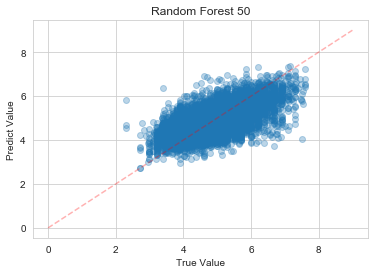

In [128]:
run_experiment('Random Forest 50', RandomForestRegressor(10), X_train, y_train, X_test)

## Submission

In [133]:
# X_submit_columns = ['accommodates', 'bathrooms', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'number_of_reviews', \
#              'review_scores_rating', 'bedrooms', 'beds'] + list(df_proptype.columns) + list(df_roomtype.columns) \
#             + list(df_test_bedtype.columns) + list(df_test_cancel.columns) + list(df_test_cleanfee.columns) + list(df_test_city.columns) \
#             + ['latitude', 'longitude', 'host_pic_false', 'host_pic_true', 'host_id_false', 'host_id_true', 'instant_false', 'instant_true']
# X_submit_columns = ['accommodates', 'bathrooms', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'number_of_reviews', \
#              'review_scores_rating', 'bedrooms', 'beds'] + list(df_test_cancel.columns) + list(df_test_cleanfee.columns) + list(df_test_city.columns) \
#             + ['latitude', 'longitude', 'host_pic_false', 'host_pic_true', 'host_id_false', 'host_id_true', 'instant_false', 'instant_true']
X_test_columns = ['accommodates', 'bathrooms', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'number_of_reviews', \
             'review_scores_rating', 'bedrooms', 'beds'] + list(df_test_cancel.columns)

In [143]:
submission_model = RandomForestRegressor(10).fit(df[X_test_columns], df[y_column])
df_test['log_price'] = submission_model.predict(df_test[X_test_columns])

C:\Users\mdongjun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [130]:
df_test[['id', 'log_price']]
df_test[['id', 'log_price']].to_csv('1260airbnb_kagggle.csv', index=False)